<a href="https://colab.research.google.com/github/cristirofer/HSOA/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fase de exploración completada. Mejor ruta inicial: [0, 4, 2, 3, 5, 1] (Distancia: 20)
Iteración 0: Mejor distancia = 20
Iteración 50: Mejor distancia = 20
Iteración 100: Mejor distancia = 20
Iteración 150: Mejor distancia = 20
Iteración 200: Mejor distancia = 20
Iteración 250: Mejor distancia = 20

=== RESULTADOS FINALES ===
Mejor ruta encontrada: [0, 4, 2, 3, 5, 1]
Distancia total: 20


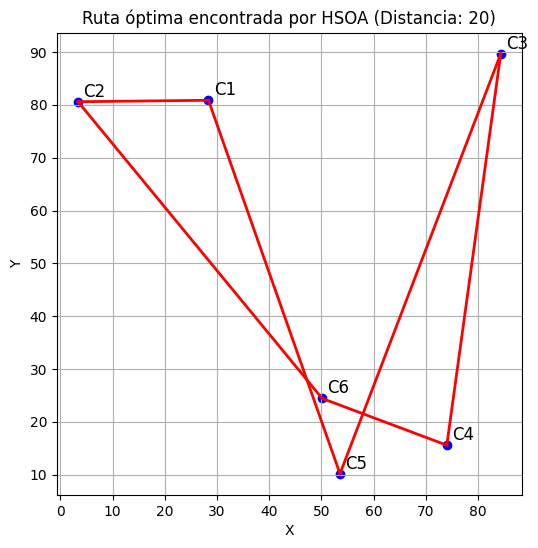

In [1]:
# ===============================
# 🦈 HAMMERHEAD SHARK OPTIMIZATION ALGORITHM (HSOA)
# Adaptación al Problema del Viajante (TSP)
# Basado en: Ali, Zafar & Bakhshi (2019)
# ===============================

import numpy as np
import random
import math
import matplotlib.pyplot as plt

# ===============================
# Datos del problema (matriz de distancias)
# ===============================
dist_matrix = np.array([
    [0, 2, 9, 10, 5, 7],
    [2, 0, 6, 3, 8, 4],
    [9, 6, 0, 4, 3, 8],
    [10, 3, 4, 0, 7, 2],
    [5, 8, 3, 7, 0, 6],
    [7, 4, 8, 2, 6, 0]
])

n_cities = len(dist_matrix)

# Parámetros del algoritmo
population_size = 20
max_iterations = 300
sonar_count = 30

# ===============================
# Funciones auxiliares
# ===============================

def route_distance(route):
    """Calcula la distancia total de una ruta (ciclo cerrado)."""
    total = 0
    for i in range(len(route) - 1):
        total += dist_matrix[route[i]][route[i + 1]]
    total += dist_matrix[route[-1]][route[0]]  # volver a la ciudad inicial
    return total

def random_route():
    """Genera una ruta aleatoria válida."""
    route = list(range(n_cities))
    random.shuffle(route)
    return route

def swap(route):
    """Intercambia dos ciudades aleatoriamente (movimiento local)."""
    r = route.copy()
    i, j = random.sample(range(len(r)), 2)
    r[i], r[j] = r[j], r[i]
    return r

def local_terrain(route):
    """Promedio de las distancias entre ciudades consecutivas (simula el 'terreno')."""
    return np.mean([dist_matrix[route[i]][route[(i + 1) % n_cities]] for i in range(n_cities)])

# ===============================
# Algoritmo HSOA-TSP
# ===============================
def HSOA_TSP():
    # ---- Fase 1: Exploración (Sonars) ----
    population = [random_route() for _ in range(sonar_count)]
    visited_counts = {tuple(r): 1 for r in population}

    fitness = [route_distance(r) for r in population]
    best_route = population[np.argmin(fitness)]
    best_distance = min(fitness)

    print(f"Fase de exploración completada. Mejor ruta inicial: {best_route} (Distancia: {best_distance})")

    # ---- Fase 2: Construcción / Refinamiento ----
    for iteration in range(max_iterations):
        new_population = []

        for shark in population:
            # Movimiento exploratorio (intercambio local)
            candidate = swap(shark)

            # Calcular R = d * t * v
            d = route_distance(candidate)
            t = local_terrain(candidate)
            v = visited_counts.get(tuple(candidate), 1)
            R_candidate = d * t * v

            # Calcular R de la ruta actual
            d_curr = route_distance(shark)
            t_curr = local_terrain(shark)
            v_curr = visited_counts.get(tuple(shark), 1)
            R_current = d_curr * t_curr * v_curr

            # El tiburón se mueve hacia la ruta con menor R
            if R_candidate < R_current:
                new_population.append(candidate)
                visited_counts[tuple(candidate)] = visited_counts.get(tuple(candidate), 0) + 1
            else:
                new_population.append(shark)
                visited_counts[tuple(shark)] += 1

        # Actualizar mejor ruta global
        fitness = [route_distance(r) for r in new_population]
        current_best_distance = min(fitness)
        current_best_route = new_population[np.argmin(fitness)]

        if current_best_distance < best_distance:
            best_distance = current_best_distance
            best_route = current_best_route

        population = new_population

        # Mostrar progreso
        if iteration % 50 == 0:
            print(f"Iteración {iteration}: Mejor distancia = {best_distance}")

    return best_route, best_distance

# ===============================
# Ejecución principal
# ===============================
best_route, best_distance = HSOA_TSP()

print("\n=== RESULTADOS FINALES ===")
print("Mejor ruta encontrada:", best_route)
print("Distancia total:", best_distance)

# ===============================
# Visualización del resultado
# ===============================
# Crear coordenadas aleatorias para visualizar las ciudades
coords = np.random.rand(n_cities, 2) * 100

plt.figure(figsize=(6, 6))
for i in range(n_cities):
    plt.scatter(coords[i][0], coords[i][1], color='blue')
    plt.text(coords[i][0]+1, coords[i][1]+1, f"C{i+1}", fontsize=12)

# Dibujar la mejor ruta
for i in range(len(best_route)):
    c1, c2 = best_route[i], best_route[(i + 1) % len(best_route)]
    plt.plot([coords[c1][0], coords[c2][0]], [coords[c1][1], coords[c2][1]], 'r-', linewidth=2)

plt.title(f"Ruta óptima encontrada por HSOA (Distancia: {best_distance})")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()
